<a href="https://colab.research.google.com/github/baileymccluresinger/PUS2024_BSinger/blob/main/Project/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
#EJI = pd.read_csv("https://github.com/baileymccluresinger/PUS2024_BSinger/blob/main/Project/Delaware.csv?raw=true")

In [94]:
#EJI.head()

In [95]:
#EJI_loc = EJI.loc[:, ['Location', 'E_IMPWTR']]
#EJI_loc.sort_values(by='E_IMPWTR')

In [96]:
#reads in csv file for 'Condition of Non-Tidal Wetlands'
nontidal = pd.read_csv("https://github.com/baileymccluresinger/PUS2024_BSinger/blob/main/Project/Condition_of_Non-Tidal_Wetlands_20241009.csv?raw=true")
#specifies usable columns from dataframe
ntid = nontidal.loc[:, ['Date', 'Sub-watershed', 'QDR', 'Total Score']]

#reads in csv file for 'Condition of Tidal Wetlands'
tidal = pd.read_csv("https://github.com/baileymccluresinger/PUS2024_BSinger/blob/main/Project/Condition_of_Tidal_Wetlands_20241009.csv?raw=true")
#rename Final Score column to Total Score to align the datasets
tidal = tidal.rename(columns={'Final score': 'Total Score'})
#add empty QCR column to align the datasets
tidal['QCR'] = pd.Series(dtype='int')
#specifies usable columns from dataframe
tid = tidal.loc[:, ['Date', 'Sub-watershed', 'QDR', 'Total Score']]

In [97]:
#reads in csv file of nitrogen levels for Station 114051, Trib Army Creek
station_114051 = pd.read_csv("https://github.com/baileymccluresinger/PUS2024_BSinger/blob/main/Project/station-114051.csv?raw=true")
#specifies usable columns
nit_tac = station_114051.loc[:, ['timestamp', 'nutrient_nitrogen_value']]
#adds a datetime object
nit_tac['timestamp'] = pd.to_datetime(nit_tac.timestamp)
#removes dates outside of the timeframe of analysis
start_date = '2017-05-24'
end_date = '2017-10-03'
timeframe = (nit_tac['timestamp'] > start_date) & (nit_tac['timestamp'] <= end_date)
nit_tac = nit_tac.loc[timeframe]

#locating Trib Army Creek
ntid_tac = ntid[ntid['Sub-watershed'].str.contains('Army Creek', na=False)]
tid_tac = tid[tid['Sub-watershed'].str.contains('Army Creek', na=False)]
#combining Trib Army Creek datasets
tac = pd.concat([ntid_tac, tid_tac], ignore_index=True, sort=False)
tac = tac.loc[:, ['Date', 'Total Score']]
#adds a datetime object and sort by date
tac['Date'] = pd.to_datetime(tac.Date)
tac = tac.sort_values(by='Date')
tac

,Date,Total Score
4,2017-05-24,89.00
1,2017-06-15,53.00
3,2017-06-15,66.00
0,2017-06-22,28.00
2,2017-06-22,83.00
5,2017-06-22,68.00
6,2017-07-17,65.00
12,2017-07-20,77.78
8,2017-07-27,71.11
11,2017-08-22,84.44


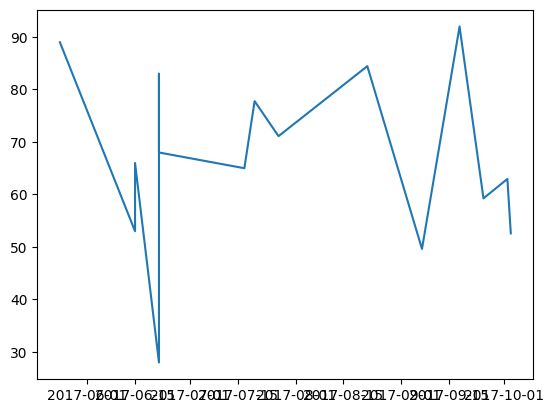

In [98]:
plt.plot(tac['Date'], tac['Total Score'])
#plt.plot(nit_tac['timestamp'], nit_tac['nutrient_nitrogen_value'])

In [99]:
#reads in csv file of nitrogen levels for Station 105171, White Clay Creek
station_105171 = pd.read_csv("https://github.com/baileymccluresinger/PUS2024_BSinger/blob/main/Project/station-105171.csv?raw=true")
#specifies usable columns
nit_wcc = station_105171.loc[:, ['timestamp', 'nutrient_nitrogen_value']]
#adds a datetime object
nit_wcc['timestamp'] = pd.to_datetime(nit_wcc.timestamp)
#removes dates outside of the timeframe of analysis
start_date = '2019-07-16'
end_date = '2019-09-05'
timeframe = (nit_wcc['timestamp'] > start_date) & (nit_wcc['timestamp'] <= end_date)
nit_wcc = nit_wcc.loc[timeframe]

#locating Deep Creek
ntid_wcc = ntid[ntid['Sub-watershed'].str.contains('White Clay Creek', na=False)]
tid_wcc = tid[tid['Sub-watershed'].str.contains('White Clay Creek', na=False)]
#combining Deep Creek datasets
wcc = pd.concat([ntid_wcc, tid_wcc], ignore_index=True, sort=False)
wcc = wcc.loc[:, ['Date', 'QDR']]
#adds a datetime object and sort by date
wcc['Date'] = pd.to_datetime(wcc.Date)
wcc = wcc.sort_values(by='Date')

wcc

,Date,QDR
18,2019-06-17,3.0
12,2019-06-17,4.0
0,2019-06-18,5.0
21,2019-06-18,3.0
14,2019-06-18,3.0
4,2019-06-18,2.0
5,2019-06-26,5.0
1,2019-06-26,2.0
36,2019-06-26,4.0
15,2019-06-26,3.0


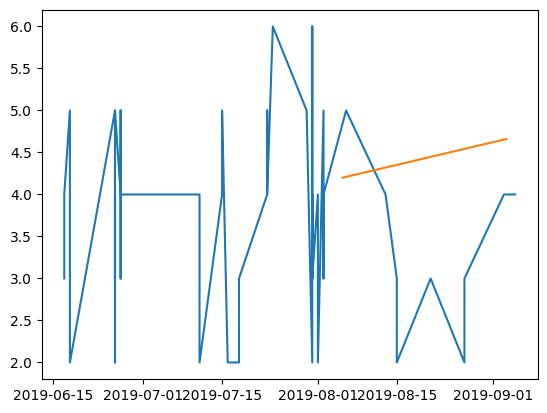

In [100]:
plt.plot(wcc['Date'], wcc['QDR'])
plt.plot(nit_wcc['timestamp'], nit_wcc['nutrient_nitrogen_value'])

In [101]:
station = pd.read_csv("https://github.com/baileymccluresinger/PUS2024_BSinger/blob/main/Project/station.csv?raw=true")
station

,OrganizationIdentifier,OrganizationFormalName,MonitoringLocationIdentifier,MonitoringLocationName,MonitoringLocationTypeName,MonitoringLocationDescriptionText,HUCEightDigitCode,DrainageAreaMeasure/MeasureValue,DrainageAreaMeasure/MeasureUnitCode,ContributingDrainageAreaMeasure/MeasureValue,...,AquiferName,LocalAqfrName,FormationTypeText,AquiferTypeName,ConstructionDateText,WellDepthMeasure/MeasureValue,WellDepthMeasure/MeasureUnitCode,WellHoleDepthMeasure/MeasureValue,WellHoleDepthMeasure/MeasureUnitCode,ProviderName
0,USGS-MD,USGS Maryland Water Science Center,DE002-383346075340301,Qd21-42,Well,NaN,2080109.0,NaN,NaN,NaN,...,Northern Atlantic Coastal Plain aquifer system,NaN,Columbia Group,Unconfined single aquifer,19891026,100.0,ft,105.0,ft,NWIS
1,USGS-MD,USGS Maryland Water Science Center,DE002-390703075371801,Jc33-12,Well,NaN,2040207.0,NaN,NaN,NaN,...,Northern Atlantic Coastal Plain aquifer system,NaN,Columbia Group,Unconfined single aquifer,19941114,79.0,ft,79.0,ft,NWIS
2,USGS-MD,USGS Maryland Water Science Center,USEPA-393916075401101,Intake on CHRISTINA RIVER 4651950,Facility: Diversion,NaN,2040205.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
3,USGS-MD,USGS Maryland Water Science Center,USEPA-394122075450001,Intake on WHITE CLAY CREEK 4651944,Facility: Diversion,NaN,2040205.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
4,USGS-MD,USGS Maryland Water Science Center,USEPA-394225075384301,Intake on WHITE CLAY CREEK 4651374,Facility: Diversion,NaN,2040205.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4886,WWMD_VA,WQX Test Organization,WWMD_VA-DDNRaE-6,Delaware Dept Natural Resources and Environmen...,Atmosphere,NaN,2040205.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1969-01-01,NaN,NaN,NaN,NaN,STORET
4887,WWMD_VA,WQX Test Organization,WWMD_VA-DDNRaE-7,Delaware Dept Natural Resources and Environmen...,Atmosphere,NaN,2040205.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1969-01-01,NaN,NaN,NaN,NaN,STORET
4888,WWMD_VA,WQX Test Organization,WWMD_VA-DDNRaE-70,Delaware Dept Natural Resources and Environmen...,Atmosphere,NaN,2040205.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1978-01-01,NaN,NaN,NaN,NaN,STORET
4889,WWMD_VA,WQX Test Organization,WWMD_VA-UENERL-2001,US EPA National Exposure Research Lab,Atmosphere,NaN,2040303.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1980-01-01,NaN,NaN,NaN,NaN,STORET


In [102]:
nutrient_2024 = pd.read_csv("https://github.com/baileymccluresinger/PUS2024_BSinger/blob/main/Project/Nutrient%20by%20Year/resultphyschem-2024-water-nutrient.csv?raw=true")

In [106]:
n2024 = nutrient_2024[nutrient_2024['CharacteristicName'].str.contains('Nitrogen', na=False)]
n2024 = n2024[n2024['ActivityMediaName'].str.contains('Water', na=False)]
n2024_filtered = n2024.loc[:, ['ActivityMediaName', 'ActivityMediaSubdivisionName', 'CharacteristicName', 'ResultSampleFractionText', 'ResultMeasureValue', 'ResultMeasure/MeasureUnitCode']]
n2024_filtered

,ActivityMediaName,ActivityMediaSubdivisionName,CharacteristicName,ResultSampleFractionText,ResultMeasureValue,ResultMeasure/MeasureUnitCode
4,Water,Surface Water,"Total Nitrogen, mixed forms",Unfiltered,NaN,NaN
5,Water,Surface Water,"Total Nitrogen, mixed forms","Filtered, field",1.57,mg/L
11,Water,Surface Water,"Total Nitrogen, mixed forms",Unfiltered,2.38,mg/L
12,Water,Surface Water,"Total Nitrogen, mixed forms","Filtered, field",3.88,mg/L
16,Water,Surface Water,"Total Nitrogen, mixed forms",Unfiltered,6.01,mg/L
...,...,...,...,...,...,...
991,Water,NaN,Nitrogen,Dissolved,10.6,mg/L
993,Water,NaN,Nitrogen,Total,8.84,mg/L
998,Water,NaN,"Total Nitrogen, mixed forms",Unfiltered,1125.31994628906,ug/L
1003,Water,NaN,Nitrogen,Dissolved,12.5,mg/L


<Axes: >

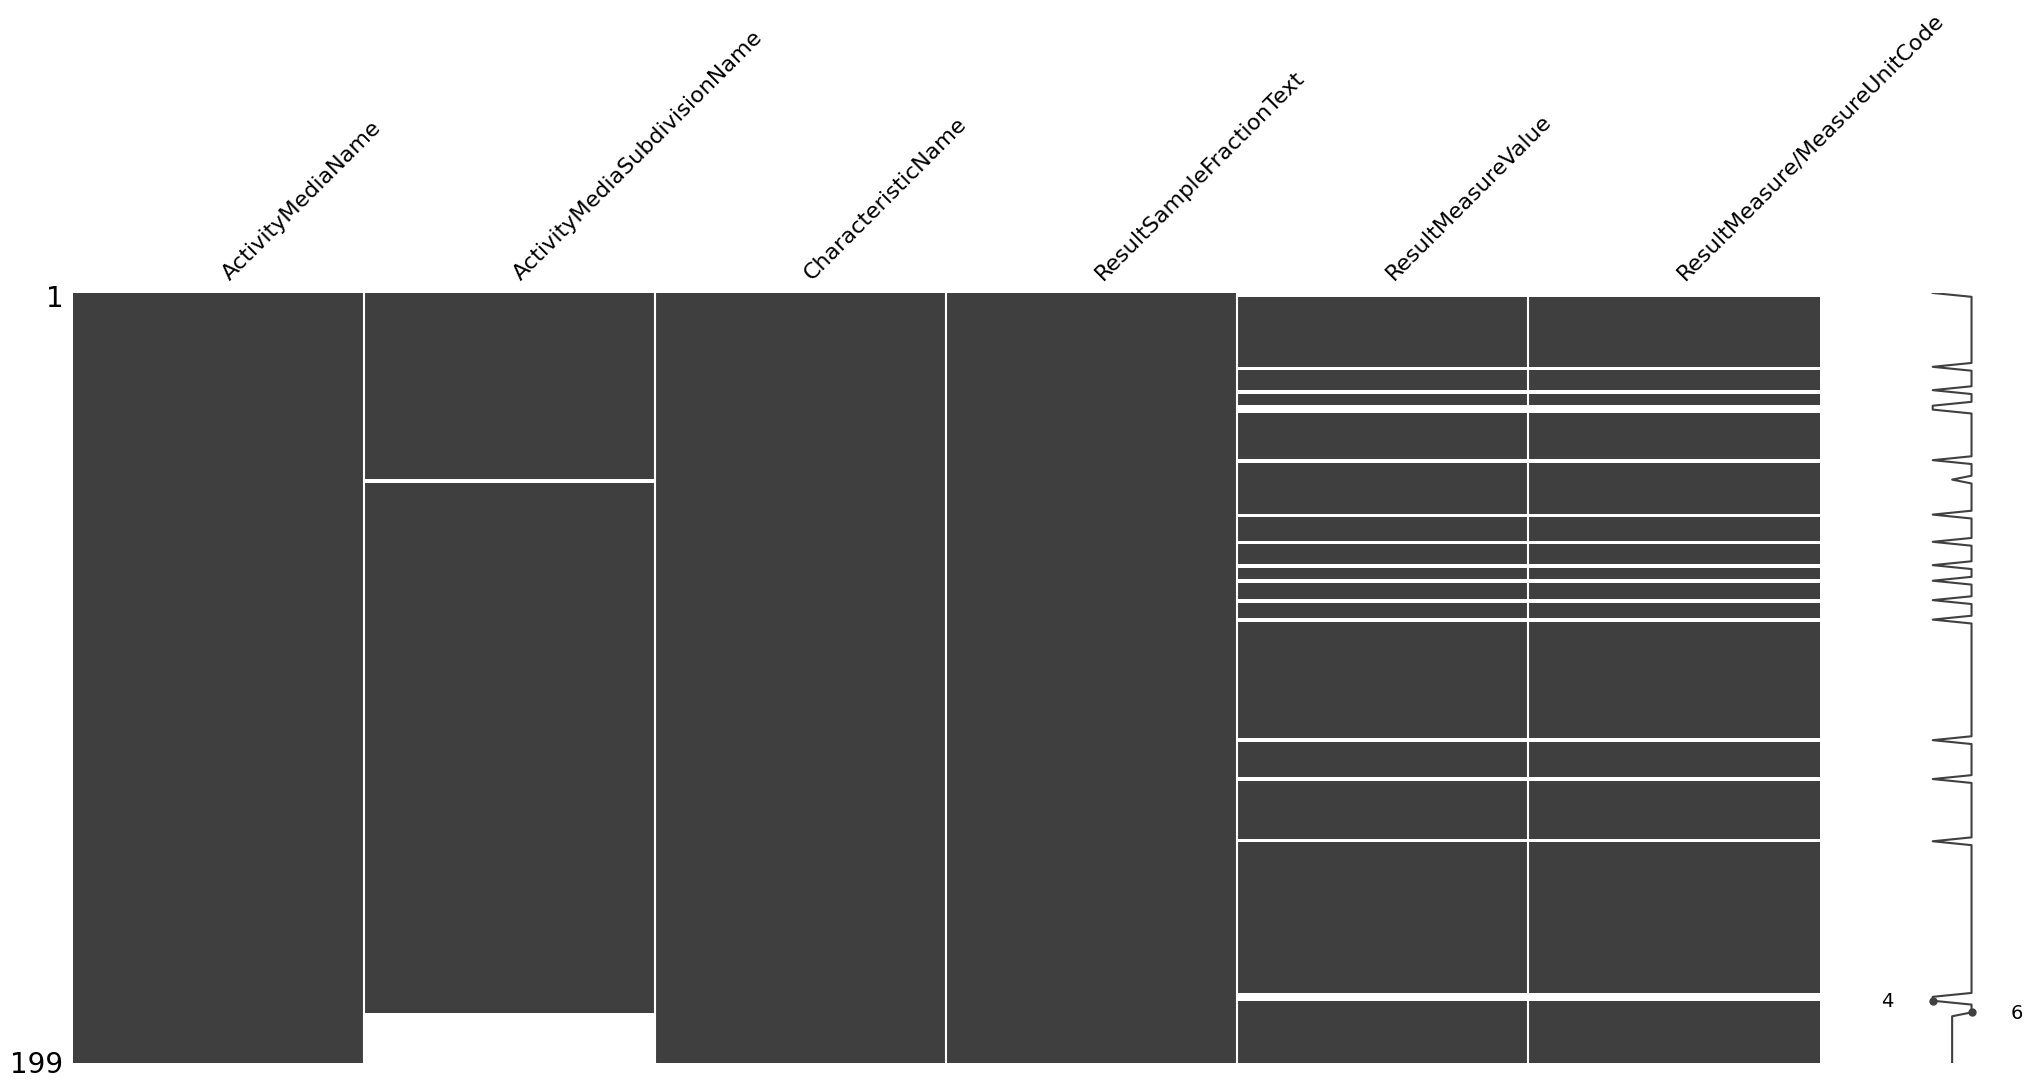

In [107]:
import missingno as msno
msno.matrix(n2024_filtered)

In [108]:
#removes rows that don't provide a water table type or nitrogen level
n2024_filtered = n2024_filtered.dropna(axis=0)
n2024_filtered

,ActivityMediaName,ActivityMediaSubdivisionName,CharacteristicName,ResultSampleFractionText,ResultMeasureValue,ResultMeasure/MeasureUnitCode
5,Water,Surface Water,"Total Nitrogen, mixed forms","Filtered, field",1.57,mg/L
11,Water,Surface Water,"Total Nitrogen, mixed forms",Unfiltered,2.38,mg/L
12,Water,Surface Water,"Total Nitrogen, mixed forms","Filtered, field",3.88,mg/L
16,Water,Surface Water,"Total Nitrogen, mixed forms",Unfiltered,6.01,mg/L
24,Water,Surface Water,"Total Nitrogen, mixed forms",Unfiltered,1.46,mg/L
...,...,...,...,...,...,...
846,Water,Surface Water,"Total Nitrogen, mixed forms",Unfiltered,5.23,mg/L
855,Water,Surface Water,"Total Nitrogen, mixed forms",Unfiltered,2.29,mg/L
880,Water,Surface Water,"Total Nitrogen, mixed forms",Unfiltered,1.16,mg/L
885,Water,Surface Water,"Total Nitrogen, mixed forms",Unfiltered,3.90,mg/L
